In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import matplotlib.font_manager as font_manager
font1 = font_manager.FontProperties(family='Times New Roman', size=18)

In [2]:
W = 350000
savings = 1500
cost_college = 2083 + (1/3)
cost_retirement = 3000

mu_monthly = 0.004442027
sigma_monthly = 0.018515243

drift = mu_monthly - ((1/2) * (sigma_monthly**2))



In [3]:
font = {'fontname':'Times New Roman'}

In [4]:
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())

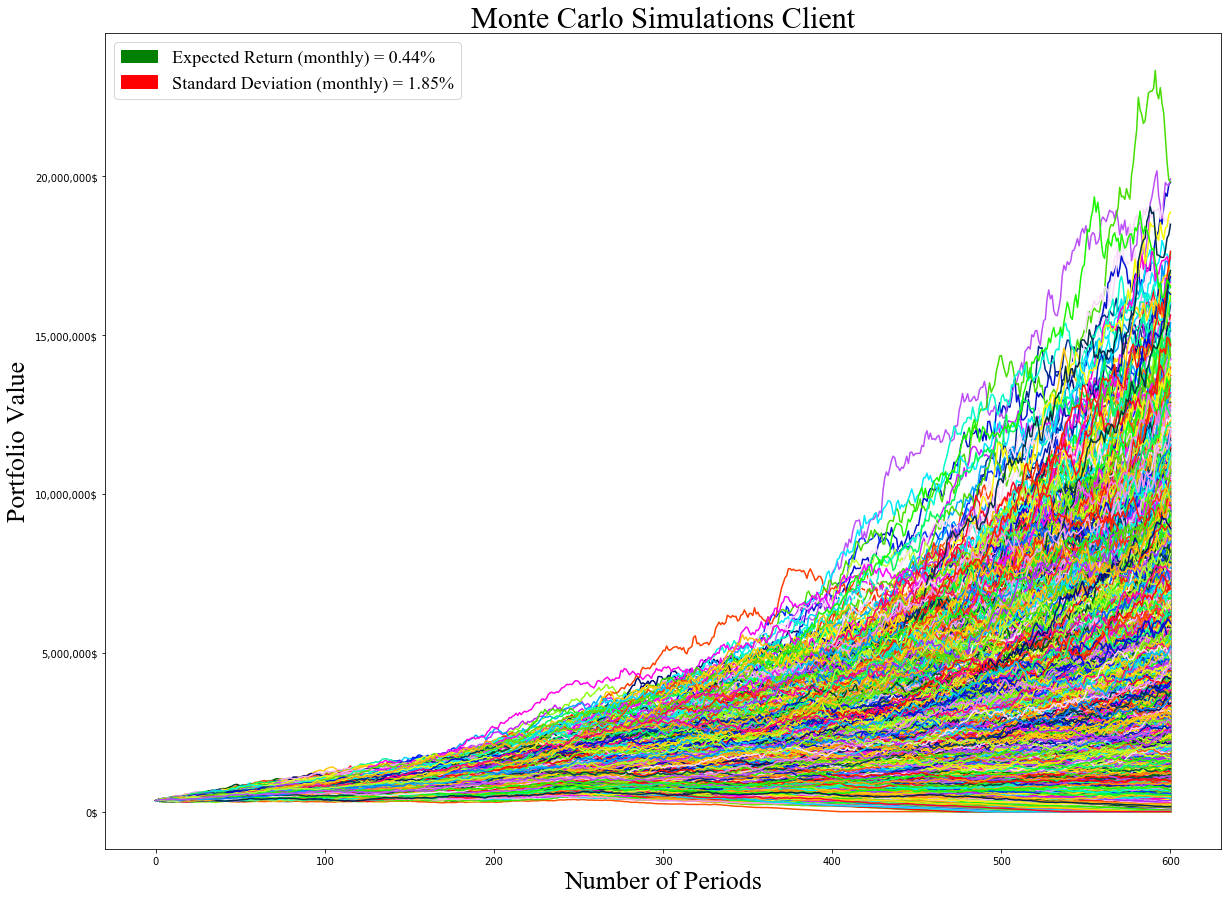

In [5]:
plt.figure(figsize=(20,15))
zero_val = 0
pos_val = 0
final_vals = []
for k in range(0,10000):
    portfolio_value = [W] 
    for t in range(1,601):
        
        vol = sigma_monthly * np.random.normal()
        shock = drift + vol
        
        if (t <= 72) or ((t >= 193) and (t <= 240)):
            if portfolio_value[t-1] > 0:
                portfolio_value.append(portfolio_value[t-1] * np.exp(shock) + savings)
            else:
                 portfolio_value.append(0)
            
        elif (t >= 73) and (t <= 192):
            if portfolio_value[t-1] > 0:
                portfolio_value.append(portfolio_value[t-1] * np.exp(shock) + savings - cost_college)
            else:
                 portfolio_value.append(0)
            
        elif (t >= 241) and (t<=601):
            if portfolio_value[t-1] > 0:
                portfolio_value.append(portfolio_value[t-1] * np.exp(shock) - cost_retirement)
            else:
                 portfolio_value.append(0)
                    
    if portfolio_value[-1] == 0:
        zero_val += 1
    if portfolio_value[-1] != 0:
        pos_val += 1
        
    final_vals.append(portfolio_value[-1])
    plt.plot(portfolio_value, color = uniqueish_color())
        
patch_sigma = mpatch.Patch(color='r', label='Standard Deviation (monthly) = ' + str((round(sigma_monthly*100,2)))+"%")
patch_expected_return = mpatch.Patch(color='g', label='Expected Return (monthly) = ' + str(round(mu_monthly*100,2))+ "%")

plt.xlabel("Number of Periods", **font, size = 26)
plt.ylabel("Portfolio Value", **font, size = 26)

plt.legend(handles = [patch_expected_return, patch_sigma], prop = font1)
plt.title("Monte Carlo Simulations Client", **font, size = 30)


plt.gca().set_yticklabels(['{0:,}$'.format(int(x)) for x in plt.gca().get_yticks()]) 
plt.savefig("10kMC.png")       

for step in steps:
    S0 = S0 * geometric + savings
    if step >= 73 and step <= 192:
        S0 = S0 * geometric + savings - costs_college
    if step >= 241 and step <= 600:
        S0 = S0 * geometric + savings - retirement

In [6]:
print(pos_val / 10000)
print((1- (pos_val/10000)))

0.9913
0.008700000000000041


In [7]:
[0, 0.1] + [x for x in range(100000,2000000) if x % 100000 == 0]

[0,
 0.1,
 100000,
 200000,
 300000,
 400000,
 500000,
 600000,
 700000,
 800000,
 900000,
 1000000,
 1100000,
 1200000,
 1300000,
 1400000,
 1500000,
 1600000,
 1700000,
 1800000,
 1900000]

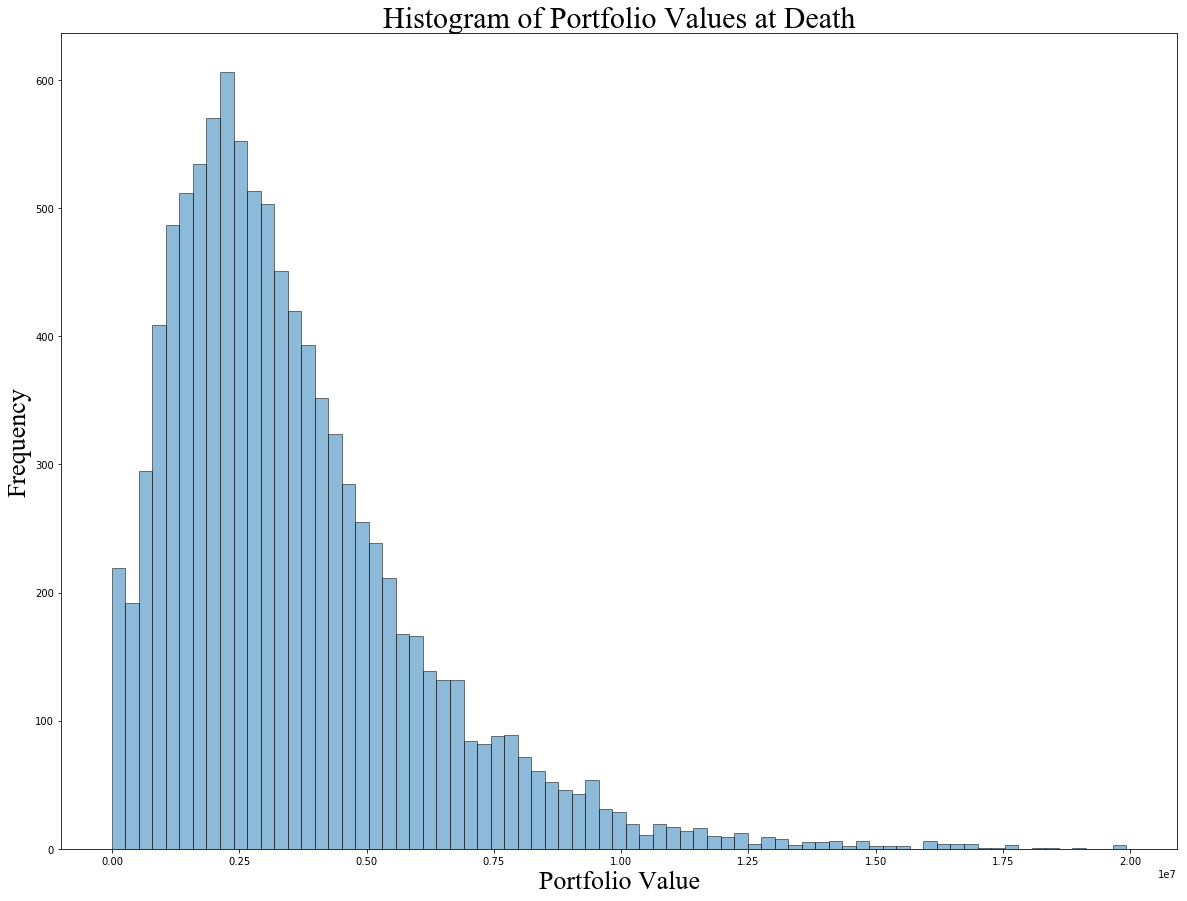

In [8]:
plt.figure(figsize=(20,15))
plt.hist(final_vals, 
         bins = 'fd', 
         alpha = 0.5, 
         ec = "black", 
         rwidth = 1000)

plt.xlabel("Portfolio Value", **font, size = 26)
plt.ylabel("Frequency", **font, size = 26)

plt.title("Histogram of Portfolio Values at Death", **font, size = 30)
plt.savefig("histMC.png") 